In [1]:
import matplotlib.pyplot as plt
import numpy as np

# paths to csv output of training loops
PATH_18_TRAIN = './models/resnet18.txt'
PATH_18_VAL = './models/resnet18val.txt'

PATH_152_TRAIN = './models/resnet152.txt'
PATH_152_VAL = './models/resnet152val.txt'

# paths to directory with inference runs
PATH_RUNS = './data/runs/'

In [32]:
with open(PATH_18_TRAIN, 'r') as f:
    # have to do this ([19::19][-1]) because of weird way I recorded train loss
    # Basically gets last training lost (since it is computed cummulatively throughout the training loop)
    # Also do [-1] to exclude last one since it is incomplete (at least for now)
    loss_train_18 = np.asarray([float(l.split(',')[1].replace('\n', '')) for l in f.readlines()])[19::19][:-1]

with open(PATH_18_VAL, 'r') as f:
    loss_val_18 = np.asarray([float(l.split(',')[1].replace('\n', '')) for l in f.readlines()])
    
with open(PATH_152_TRAIN, 'r') as f:
    # same as above
    loss_train_152 = np.asarray([float(l.split(',')[1].replace('\n', '')) for l in f.readlines()])[105::105][:-1]

with open(PATH_152_VAL, 'r') as f:
    loss_val_152 = np.asarray([float(l.split(',')[1].replace('\n', '')) for l in f.readlines()])

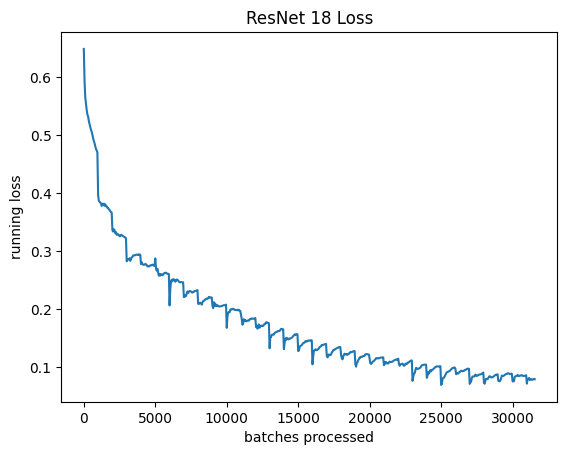

In [17]:
plt.ylabel('running loss')
plt.xlabel('batches processed')
plt.title('ResNet 18 train Loss')
# multiply by 50 because we write loss every 50 batches
plt.plot(np.arange(len(loss_train_18))*50, loss_train_18)

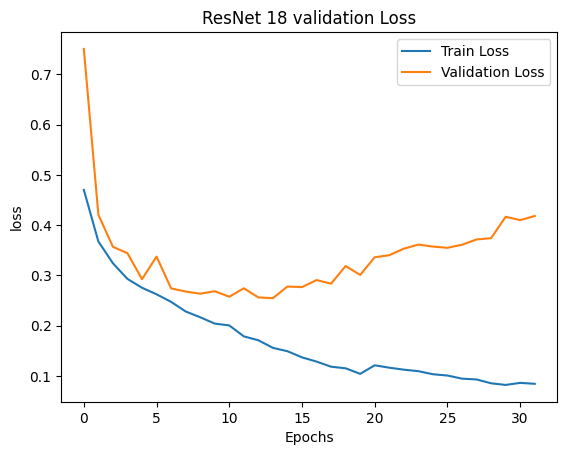

In [34]:
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.title('ResNet 18 train/validation Loss')
plt.plot(np.arange(len(loss_train_18)), loss_train_18, label='Train Loss')
plt.plot(np.arange(len(loss_val_18)), loss_val_18, label='Validation Loss')
plt.legend()

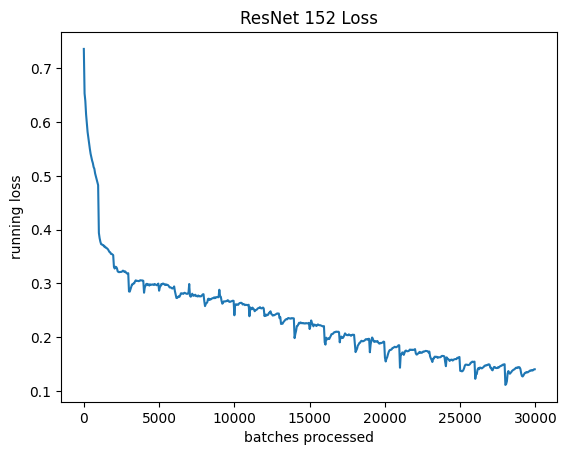

In [4]:
plt.ylabel('running loss')
plt.xlabel('batches processed')
plt.title('ResNet 152 Loss')
plt.plot(np.arange(len(loss_152))*50, loss_152)

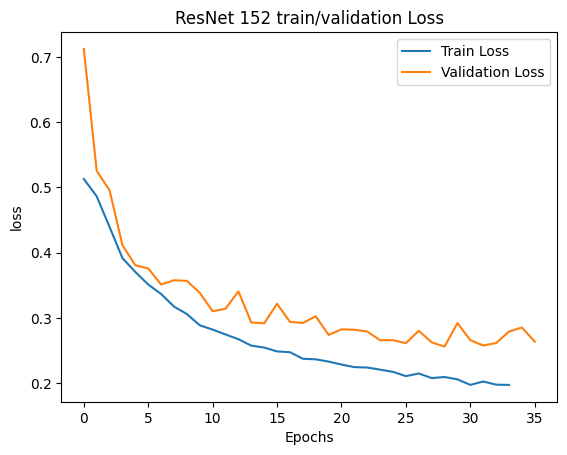

In [38]:
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.title('ResNet 152 train/validation Loss')
plt.plot(np.arange(len(loss_train_152)), loss_train_152, label='Train Loss')
plt.plot(np.arange(len(loss_val_152)), loss_val_152, label='Validation Loss')
plt.legend()

In [28]:
# note that these measurements were taken every 3 seconds throughout the entire inference time for the respective model

# for 3 runs of 18
wattages = []
energies = []
for i in range(1,4):
    with open(PATH_RUNS+f'18run{i}.txt', 'r') as f:
        lines = np.asarray([float(l.replace('\n', '')) for l in f.readlines()])

        print(f'RUN {i}')
        energies.append(np.sum(lines*3))
        print(f'Total energy consumed: {energies[i-1]:.3f} joules')
        
        wattages.append(lines.mean())
        print(f'Mean wattage for run {i}: {wattages[i-1]:.3f} watts')

        print()

print(f'Mean wattage of all runs: {sum(wattages)/3:.3f} watts')
print(f'Mean energy of all runs: {sum(energies)/3:.3f} joules')

RUN 1
Total energy consumed: 4361.424 joules
Mean wattage for run 1: 8.355 watts

RUN 2
Total energy consumed: 4126.815 joules
Mean wattage for run 2: 8.044 watts

RUN 3
Total energy consumed: 4329.843 joules
Mean wattage for run 3: 8.295 watts

Mean wattage of all runs: 8.231 watts
Mean energy of all runs: 4272.694 joules


In [29]:
# for 3 runs of 152
wattages = []
energies = []
for i in range(1,4):
    with open(PATH_RUNS+f'152run{i}.txt', 'r') as f:
        lines = np.asarray([float(l.replace('\n', '')) for l in f.readlines()])

        print(f'RUN {i}')
        energies.append(np.sum(lines*3))
        print(f'Total energy consumed: {energies[i-1]:.3f} joules')
        
        wattages.append(lines.mean())
        print(f'Mean wattage for run {i}: {wattages[i-1]:.3f} watts')

        print()

print(f'Mean wattage of all runs: {sum(wattages)/3:.3f} watts')
print(f'Mean energy of all runs: {sum(energies)/3:.3f} joules')

RUN 1
Total energy consumed: 31867.031 joules
Mean wattage for run 1: 7.256 watts

RUN 2
Total energy consumed: 32889.153 joules
Mean wattage for run 2: 7.328 watts

RUN 3
Total energy consumed: 31837.435 joules
Mean wattage for run 3: 7.219 watts

Mean wattage of all runs: 7.268 watts
Mean energy of all runs: 32197.873 joules


In [30]:
# just for fun let's graph wattage of one resnet 18 run
with open(PATH_RUNS+'18run1.txt', 'r') as f:
    lines = np.asarray([float(l.replace('\n', '')) for l in f.readlines()])

plt.ylabel('Power (watts)')
plt.xlabel('Time (seconds)')
plt.plot(np.linspace(0, lines.shape))

[ 5.72879928  8.99158901  6.74331191  6.57695388 10.35152936 11.34284103
  7.0103087  10.9751969  10.6937684   6.68908993  5.20988391 10.67658766
  7.45694716 10.92399962  7.11087575 10.17149151  9.52608498 10.68192789
  6.27994177  9.27715494 10.81101426  7.11054021  9.41880833 10.60290731
  7.34422392  6.20519623  9.98639891 10.90785926  7.48207753  6.95155999
  9.11838105  7.16908865  9.24253139  9.48849765  6.67007725  7.03644532
 10.01692498 10.41665033  5.21710339  6.74960659  9.32589439  7.4526659
  7.13304237 10.66870065 10.59333324 10.77376271  6.56562827  7.01302533
  5.49614358  5.48687892  9.82050377  9.18946332 10.29115863  6.21560669
  6.76399281  7.01180526  6.58302759 10.9369271   8.92845243  6.96142055
 10.3764857   9.92390452  7.04228869  7.08420945  9.43182441  9.04683382
 10.83992899  7.10127089  9.48776672  7.19771283  8.12186907  9.60131679
  6.29569764 10.93891409  7.02720518  9.95211119  6.79116779  5.04539901
 10.82848312 10.93362359  6.94079633  7.03298861 10.